In [1]:
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import  EarlyStopping
import random

# 기존 train 데이터 불러오기
# [11, 505000, 2]
train_sub_data = scipy.io.loadmat('../datas/160hz/train_5day_160hz.mat', squeeze_me=True)['data']

# 퍼블릭 데이터 불러오기
# [109, 9600, 2]
public_data = scipy.io.loadmat('../datas/160hz/Motor_Imagery.mat', squeeze_me=True)['data']

# 기존 test 데이터 불러오기
# [11, 101402, 2]
test_sub_data = scipy.io.loadmat('../datas/160hz/test_6day_160hz(2).mat', squeeze_me=True)['data']

# # 데이터를 480(= 160*3) 크기로 사용할 수 있도록 그 배수로 전체 데이터 잘라줌
data_cut_size = 504960 # 480*1052 = 504960
public_cut_size = 9600 # 480*20 = 9600
test_cut_size = 101280 # 480*211 = 101280

# 트레인 sub 수
train_sub_cnt = train_sub_data.shape[0]
# 퍼블릭 데이터 sub 수
public_sub_cnt = public_data.shape[0]
# test 데이터 sub 수
test_sub_cnt = test_sub_data.shape[0]

sub_cnt = train_sub_cnt + public_sub_cnt

train_sub_cut = train_sub_data[:, 0:data_cut_size, :]
public_data_cut = public_data[:, 0:public_cut_size, :]
test_sub_cut = test_sub_data[:, 0:test_cut_size, :]

print(train_sub_cut.shape)
print(test_sub_cut.shape)
print(public_data_cut.shape)

# 데이터를 스케일링 하기 위해 2D로 reshape
train_sub_2D = train_sub_cut.reshape(-1, 1)
public_data_2D = public_data_cut.reshape(-1, 1)
test_2D = test_sub_cut.reshape(-1, 1)

# 데이터를 StandardScaler로 스케일링
# 데이터의 형태가 많이 다르기 때문에 따로 스케일링 해줘야함
SDscaler = StandardScaler()
SDscaler.fit(train_sub_2D)
train_scaled = SDscaler.transform(train_sub_2D)
test_scaled = SDscaler.transform(test_2D)

#SDscaler_public = StandardScaler()
#SDscaler_public.fit(public_data_2D)
public_scaled = SDscaler.transform(public_data_2D)

# # 스케일링 후 train_data 합쳐줌
# train_data = np.append(origin_data_scaled, public_data_scaled)
# train_data = train_data.reshape(-1, 1)

# 데이터 크기를 480로 맞춰줌
# 5554560/480 = 115,72
data_size = 480
train_sub_size = 1052
public_sub_size = 20
test_sub_size = 211

train_data = train_scaled.reshape(train_sub_cnt * train_sub_size, data_size, 2)
public_data = public_scaled.reshape(public_sub_cnt * public_sub_size, data_size, 2)
test_data = test_scaled.reshape(test_sub_cnt * test_sub_size, data_size, 2)

print(train_data.shape)
print(public_data.shape)
print(test_data.shape)

#test data를 sub:other=1:1로 만들기 위해서 각 sub 추출
test_data_each = []
for i in range(test_sub_cnt):
    test_data_each.insert(i, test_data[i*test_sub_size:(i+1)*test_sub_size, :, :])
# print(test_data_each)

#train data를 sub:other=1:1로 만들기 위해서 각 sub 추출
train_data_each = []
for i in range(train_sub_cnt):
    train_data_each.insert(i, train_data[i*train_sub_size:(i+1)*train_sub_size, :, :])
    
public_data_each = []
for i in range(public_sub_cnt):
    public_data_each.insert(i, public_data[i*public_sub_size:(i+1)*public_sub_size, :, :])

(11, 504960, 2)
(11, 101280, 2)
(109, 9600, 2)
(11572, 480, 2)
(2180, 480, 2)
(2321, 480, 2)


In [2]:
# 평가 지표
test_pre_all = []
conf_mat_all = []
test_loss_all = []
test_acc_all = []
test_sen_all = []
test_spe_all = []
FRR_all = []
FAR_all = []

(2104, 480, 2)
(422, 480, 2)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 160, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 53, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (No

106/106 [==============================] - 1s 9ms/step - loss: 0.0348 - accuracy: 0.9905
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0392 - accuracy: 0.9848
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0284 - accuracy: 0.9895
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0417 - accuracy: 0.9857
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0157 - accuracy: 0.9938
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0093 - accuracy: 0.9962
Epoch 68/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0483 - accuracy: 0.9876
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0161 - accuracy: 0.9933
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0303 - accuracy:

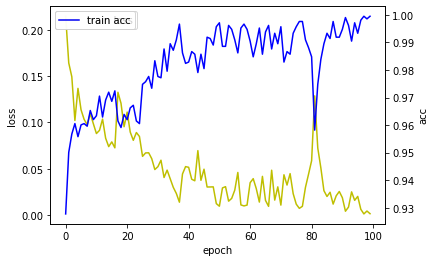

14/14 - 0s - loss: 1.9584 - accuracy: 0.7393
[[105 106]
 [  4 207]]

 [211 211]
sensitivity :  0.981042654028436
specificity :  0.4976303317535545


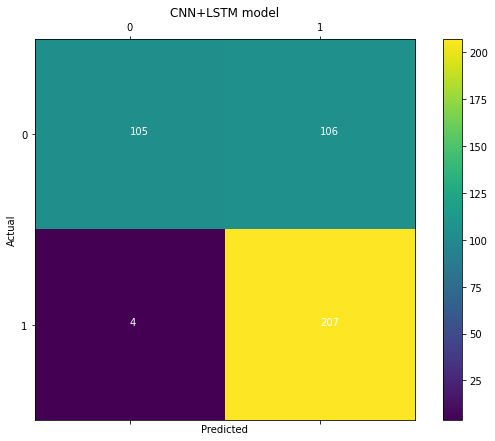

(2104, 480, 2)
(422, 480, 2)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 160, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 53, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (

106/106 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.9990
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0218 - accuracy: 0.9957
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0408 - accuracy: 0.9862
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0270 - accuracy: 0.9933
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0311 - accuracy: 0.9895
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 0.9981
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9981
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0358 - accuracy: 0.9905
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0085 - accuracy: 

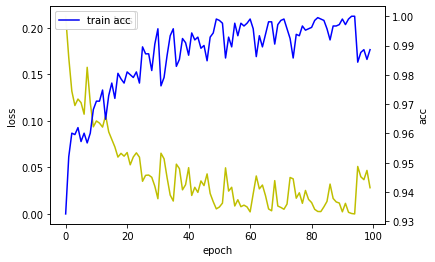

14/14 - 0s - loss: 1.3367 - accuracy: 0.7275
[[ 99 112]
 [  3 208]]

 [211 211]
sensitivity :  0.985781990521327
specificity :  0.46919431279620855


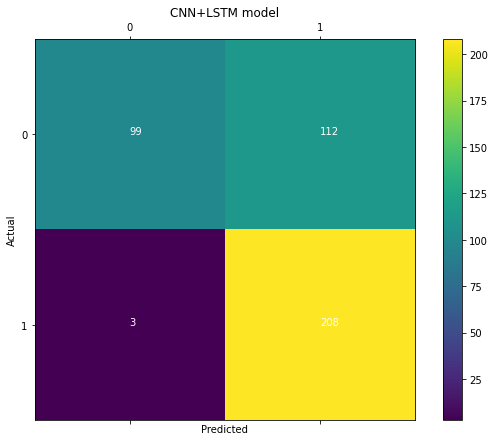

(2104, 480, 2)
(422, 480, 2)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 160, 16)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 53, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (

106/106 [==============================] - 1s 9ms/step - loss: 0.0784 - accuracy: 0.9796
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0326 - accuracy: 0.9895
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0169 - accuracy: 0.9933
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0162 - accuracy: 0.9943
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0225 - accuracy: 0.9919
Epoch 67/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0310 - accuracy: 0.9881
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0120 - accuracy: 0.9971
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9986
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 4.9287e-04 - accur

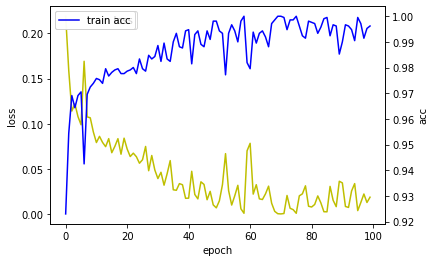

14/14 - 0s - loss: 0.6493 - accuracy: 0.7938
[[126  85]
 [  2 209]]

 [211 211]
sensitivity :  0.990521327014218
specificity :  0.5971563981042654


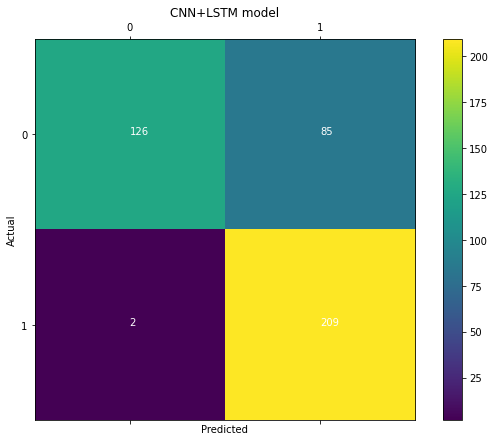

(2104, 480, 2)
(422, 480, 2)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 160, 16)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0439 - accuracy: 0.9867
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0336 - accuracy: 0.9867
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0157 - accuracy: 0.9938
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0134 - accuracy: 0.9952
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0117 - accuracy: 0.9957
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0300 - accuracy: 0.9895
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0111 - accuracy: 0.9971
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0055 - accuracy: 

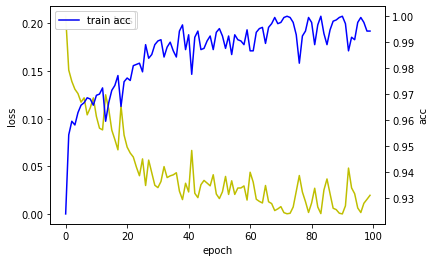

14/14 - 0s - loss: 1.8813 - accuracy: 0.7393
[[104 107]
 [  3 208]]

 [211 211]
sensitivity :  0.985781990521327
specificity :  0.4928909952606635


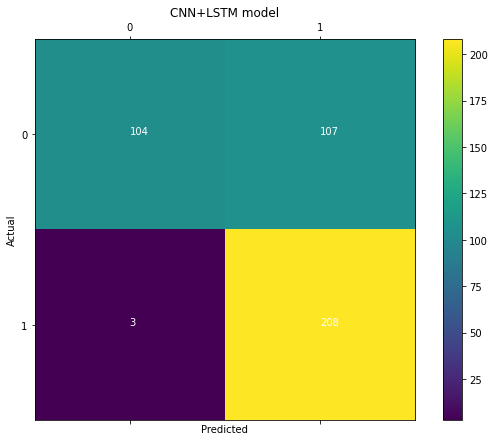

(2104, 480, 2)
(422, 480, 2)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0499 - accuracy: 0.9876
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0800 - accuracy: 0.9705
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0470 - accuracy: 0.9796
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0325 - accuracy: 0.9862
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0191 - accuracy: 0.9948
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0289 - accuracy: 0.9881
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0057 - accuracy: 0.9976
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 3.5703e-04 - accuracy: 1.0000
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0295 - accura

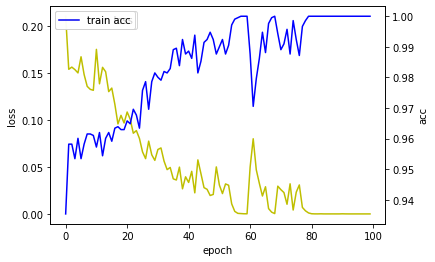

14/14 - 0s - loss: 5.2079 - accuracy: 0.7180
[[100 111]
 [  8 203]]

 [211 211]
sensitivity :  0.9620853080568721
specificity :  0.47393364928909953


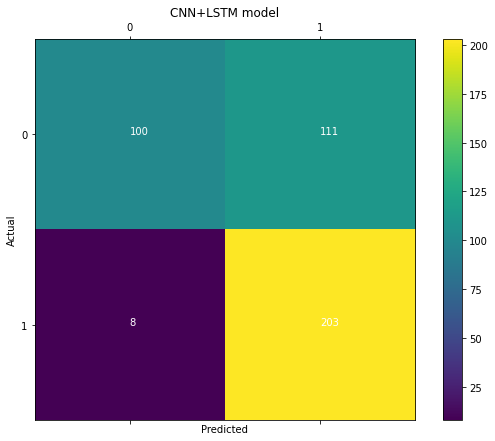

(2104, 480, 2)
(422, 480, 2)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0417 - accuracy: 0.9876
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0541 - accuracy: 0.9857
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0534 - accuracy: 0.9872
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0713 - accuracy: 0.9791
Epoch 65/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0693 - accuracy: 0.9853
Epoch 66/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0505 - accuracy: 0.9867
Epoch 67/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0839 - accuracy: 0.9772
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0918 - accuracy: 0.9772
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0453 - accuracy: 0.9876
Epoch 70/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0578 - accura

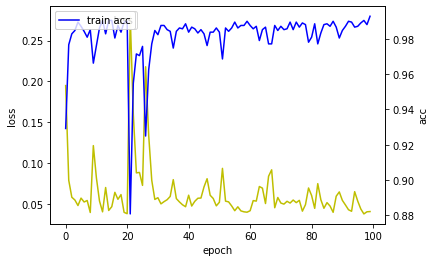

14/14 - 0s - loss: 0.2901 - accuracy: 0.9076
[[172  39]
 [  0 211]]

 [211 211]
sensitivity :  1.0
specificity :  0.8151658767772512


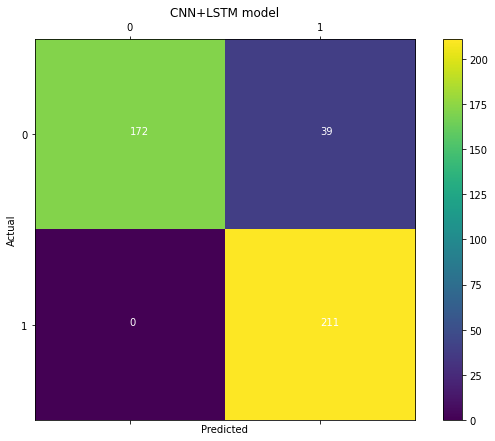

(2104, 480, 2)
(422, 480, 2)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0260 - accuracy: 0.9910
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0242 - accuracy: 0.9910
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0147 - accuracy: 0.9943
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.9990
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 5.3792e-04 - accuracy: 1.0000
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 5.8819e-05 - accuracy: 1.0000
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 1.4846e-04 

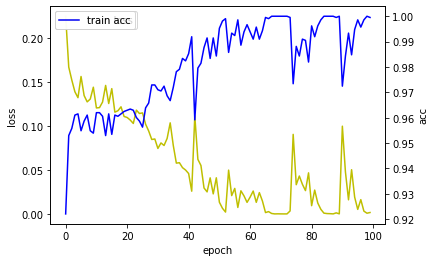

14/14 - 0s - loss: 5.5381 - accuracy: 0.5403
[[ 20 191]
 [  3 208]]

 [211 211]
sensitivity :  0.985781990521327
specificity :  0.0947867298578199


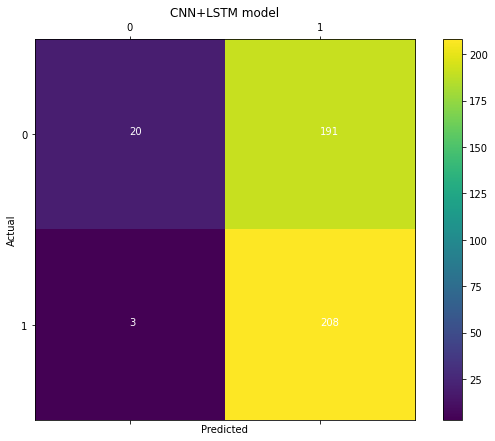

(2104, 480, 2)
(422, 480, 2)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0198 - accuracy: 0.9924
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0179 - accuracy: 0.9924
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0095 - accuracy: 0.9962
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0261 - accuracy: 0.9905
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 0.9986
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9986
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9986
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 6.5247e-04 - accuracy: 1.0000
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0173 - accura

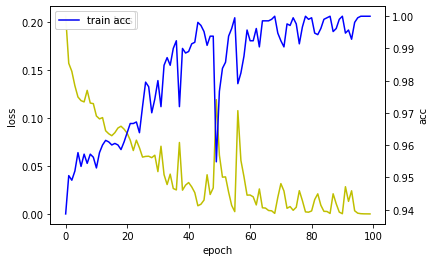

14/14 - 0s - loss: 4.9903 - accuracy: 0.5924
[[ 45 166]
 [  6 205]]

 [211 211]
sensitivity :  0.9715639810426541
specificity :  0.2132701421800948


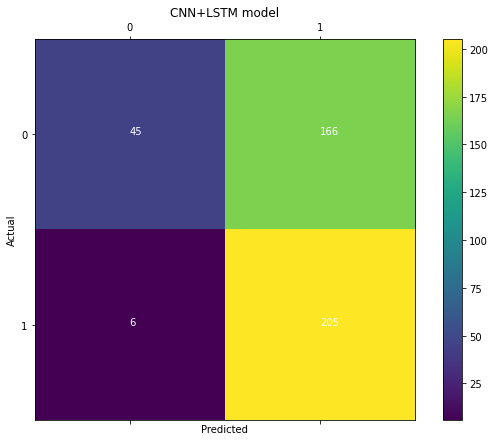

(2104, 480, 2)
(422, 480, 2)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0258 - accuracy: 0.9910
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0156 - accuracy: 0.9943
Epoch 63/100
106/106 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0524 - accuracy: 0.9834
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0159 - accuracy: 0.9957
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0087 - accuracy: 0.9981
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0282 - accuracy: 0.9900
Epoch 70/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0114 - accuracy:

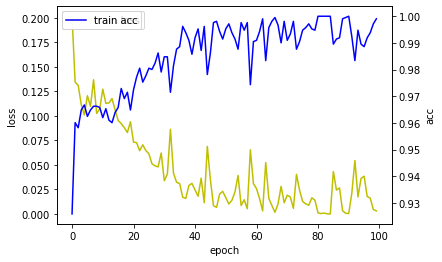

14/14 - 0s - loss: 2.2046 - accuracy: 0.7299
[[100 111]
 [  3 208]]

 [211 211]
sensitivity :  0.985781990521327
specificity :  0.47393364928909953


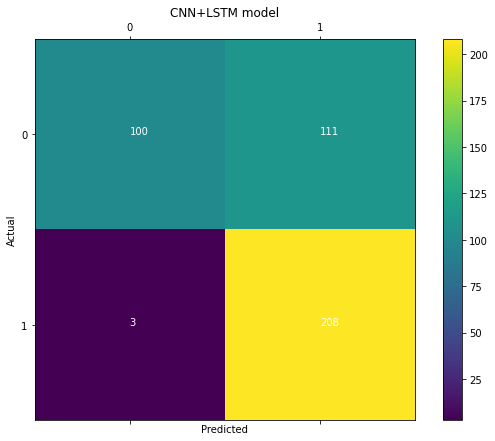

(2104, 480, 2)
(422, 480, 2)
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (

106/106 [==============================] - 1s 9ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 61/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0205 - accuracy: 0.9962
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0249 - accuracy: 0.9933
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0092 - accuracy: 0.9981
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0206 - accuracy: 0.9957
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0141 - accuracy: 0.9957
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0194 - accuracy: 0.9957
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0371 - accuracy: 0.9886
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0129 - accuracy: 

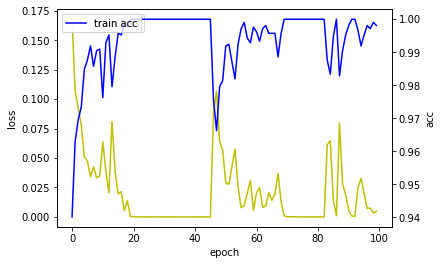

14/14 - 0s - loss: 0.2511 - accuracy: 0.9502
[[192  19]
 [  2 209]]

 [211 211]
sensitivity :  0.990521327014218
specificity :  0.909952606635071


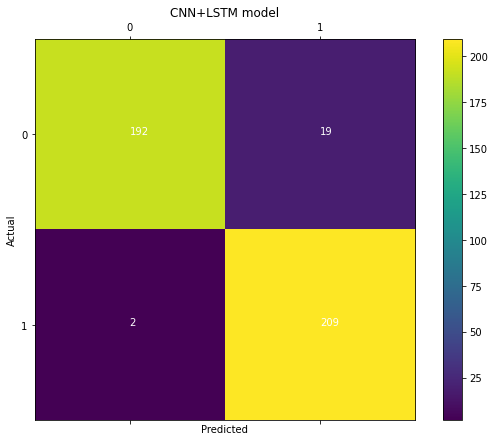

(2104, 480, 2)
(422, 480, 2)
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_32 (MaxPooling 

106/106 [==============================] - 1s 9ms/step - loss: 1.2106e-04 - accuracy: 1.0000
Epoch 62/100
106/106 [==============================] - 1s 9ms/step - loss: 4.3467e-05 - accuracy: 1.0000
Epoch 63/100
106/106 [==============================] - 1s 9ms/step - loss: 4.0489e-05 - accuracy: 1.0000
Epoch 64/100
106/106 [==============================] - 1s 9ms/step - loss: 8.9911e-05 - accuracy: 1.0000
Epoch 65/100
106/106 [==============================] - 1s 9ms/step - loss: 2.5355e-04 - accuracy: 1.0000
Epoch 66/100
106/106 [==============================] - 1s 9ms/step - loss: 2.4254e-05 - accuracy: 1.0000
Epoch 67/100
106/106 [==============================] - 1s 9ms/step - loss: 2.8679e-05 - accuracy: 1.0000
Epoch 68/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0167 - accuracy: 0.9981
Epoch 69/100
106/106 [==============================] - 1s 9ms/step - loss: 0.0899 - accuracy: 0.9686
Epoch 70/100
106/106 [==============================] - 1s 9ms/step

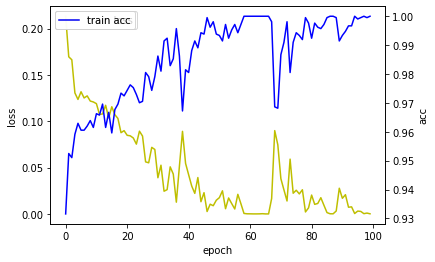

14/14 - 0s - loss: 3.3633 - accuracy: 0.6825
[[ 79 132]
 [  2 209]]

 [211 211]
sensitivity :  0.990521327014218
specificity :  0.3744075829383886


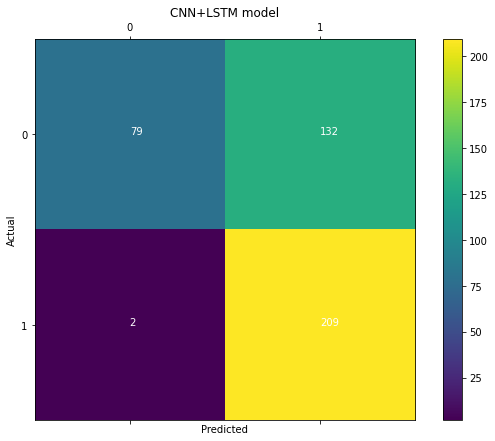

average_accuracy
0.7382593696767633
average_sensitivity
0.984489444205084
average_specificity
0.4920292977165015


In [3]:
# 각 sub 마다 모델 학습

# train data를 sub:other = 1:1로 만들기
# 데이터 크기 504960 : 504960
# 3초 덩어리 개수 1052 : 1052
# 8 * 19 + 9 * 100 = 1052

# test data를 sub:other = 1:1로 만들기
# 데이터 크기 101280 : 101280
# 3초 덩어리 개수 211 : 211
# 21 * 9 + 22 * 1 = 211

for i in range(train_sub_cnt):
    cnt = 0
    train_data_n = train_data_each[i]
    test_data_n = test_data_each[i]
    
    for j in range(sub_cnt):
        if j != i and cnt < 19:
            cnt = cnt + 1
            if j < 11:
                train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 8)), axis = 0)
            else:
                train_data_n = np.append(train_data_n, np.array(random.sample(list(public_data_each[j-11]), 8)), axis = 0)
        elif j != i and cnt >= 19:
            train_data_n = np.append(train_data_n, np.array(random.sample(list(public_data_each[j-11]), 9)), axis = 0)
    
    cnt = 0
    
    for j in range(test_sub_cnt):
        if j != i and cnt < 9:
            cnt = cnt + 1
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 21)), axis = 0)
        elif j != i and cnt >= 9:
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 22)), axis = 0)
            
    print(train_data_n.shape)
    print(test_data_n.shape)
    
    train_label = np.zeros(2104)
    test_label = np.zeros(422)
    
    for j in range(len(train_label)):
        if (j < train_sub_size):
            train_label[j] = 1
            
    for j in range(len(test_label)):
        if (j < test_sub_size):
            test_label[j] = 1
            
    ################################################################
    # 모델 구성하기                                                #
    # 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력뉴런 1개   #
    ################################################################

    # Cnn 층
    inputs = tf.keras.Input(shape = (480, 2))

    layers = tf.keras.layers.Conv1D(filters = 16, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(inputs)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    # LSTM 층
    layers = tf.keras.layers.LSTM(64)(layers)

    # Dense 층
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.Dense(128, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.01)(layers)
    layers = tf.keras.layers.Dense(64, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.05)(layers)
    layers = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

    model = tf.keras.models.Model(inputs = inputs, outputs = layers)
    model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.005), metrics=['accuracy'])
    model.summary()
    
    early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20)
    
#     # train 데이터를 train과 validation으로 분배
#     # validation 데이터를 여러 sub에서 가져갈 수 있도록 shuffle
#     x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.1, shuffle=True, random_state=1)

    print('##########')
    print('# sub', i+1, ' #')
    print('##########')

    # 모델 돌리기
#     hist = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_val, y_val), verbose=1, callbacks= [early_stopping])
    hist = model.fit(train_data_n, train_label, batch_size=20, epochs=100, verbose=1)
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    
    
    acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
    acc_ax.set_ylabel('acc')
    acc_ax.legend(loc='upper left')
    
    plt.show()
    
    # save model
    model.save('Sub_Model_' + str(i + 1) + '.h5')
    
    test_loss, test_acc = model.evaluate(test_data_n, test_label, verbose= 2)
    test_pred = model.predict(test_data_n)
    
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)
    
    # 확률이 0.5이상이면 자신(1), 작으면 타인(0)
    for i in range(len(test_pred)):
        if(0.5 <= test_pred[i]):
            test_pred[i] = 1

        else:
            test_pred[i] = 0
            
            
    test_pre_all.append(test_pred)
    
    # confusion matrix 생성
    conf_matrix = confusion_matrix(test_label, test_pred)
    
    #############################################################
    #       conf_matrix[0][0] = TN      conf_matrix[0][1] = FP  #
    #       conf_matrix[1][0] = FN      conf_matrix[1][1] = TP  #
    #############################################################

    print(conf_matrix)
    conf_mat_all.append(conf_matrix)

    # sum 이용 각 행 더하기
    row = conf_matrix.sum(axis=1)
    print('\n', row)

    # row[0] = spec의 분모, row[1] = sens의 분모

    test_sensitivity = conf_matrix[1][1] / row[1]
    test_specificity = conf_matrix[0][0] / row[0]

    print('sensitivity : ', test_sensitivity)
    print('specificity : ', test_specificity) 
    
    test_sen_all.append(test_sensitivity)
    test_spe_all.append(test_specificity)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    cax = ax.matshow(conf_matrix)

    fig.colorbar(cax)

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], color="white")

    plt.title('CNN+LSTM model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()
    
print('average_accuracy')
print(np.mean(test_acc_all))
print('average_sensitivity')
print(np.mean(test_sen_all))
print('average_specificity')
print(np.mean(test_spe_all))

In [4]:
test_precision_all = []
for i in range(len(conf_mat_all)):
    test_precision = conf_mat_all[i][1][1] / (conf_mat_all[i][1][1] + conf_mat_all[i][0][1])
    test_precision_all.append(test_precision)
    
test_pre_all_o = test_pre_all
conf_mat_all_o = conf_mat_all
test_loss_all_o = test_loss_all
test_acc_all_o = test_acc_all
test_sen_all_o = test_sen_all
test_spe_all_o = test_spe_all
test_precision_all_o = test_precision_all

predict = np.array(test_pre_all_o, dtype=np.int8)
print(predict.shape[0])
print(predict.shape[1])
print(predict.shape[2])
predict = predict.reshape(11, 422).T

conf_mat = np.array(conf_mat_all_o)

loss = np.array(test_loss_all_o)

acc = np.array(test_acc_all_o)
sen = np.array(test_sen_all_o)
spe = np.array(test_spe_all_o)
pre = np.array(test_precision_all_o)

import pandas as pd

# Create a Pandas Excel writer
writer = pd.ExcelWriter('Result.xlsx')

# Test_Predict
df_predict = pd.DataFrame([])

# Confusion_Matrix
# conf_mat의 엑셀에서 위치 저장할 변수
conf_row = 1
conf_col = 0

# 포문쓰기
for i in range(test_sub_cnt):
#     columns = list("01")
#     columns = list(zip(['Sub_' + str(i+1)] * 2, columns))
#     columns = pd.MultiIndex.from_tuples(columns)  
    df_conf = pd.DataFrame(conf_mat[i], index=['Other', 'Sub'], columns=[['Sub_' + str(i+1)] * 2, ['Negative', 'Positive']])
#     df_conf = pd.DataFrame(conf_mat[i], index=['Other', 'Sub'], columns=['a', 'b'])
#     df_conf.columns = pd.MultiIndex.from_tuples(zip(['Sub_' + str(i+1)] * 2, df_conf.columns)) 
#     df_conf.index = ['Other', 'Sub']
#     df_conf.columns = pd.MultiIndex.from_product([['Sub_' + str(i+1)],'0'])
    df_conf.to_excel(writer, sheet_name='Conf_Mat', startrow=conf_row, startcol=conf_col)
    conf_col += 4
    if i == 2:
        conf_row += 6
        conf_col = 0
    elif i == 5:
        conf_row += 6
        conf_col = 0
    elif i == 8:
        conf_row += 6
        conf_col = 0


# Test_Loss
df_loss = pd.DataFrame(loss)
df_loss = df_loss.transpose()

# Test_Accuracy
df_acc = pd.DataFrame(acc)
df_acc = df_acc.transpose()

# Test_Sensitivitiy
df_sen = pd.DataFrame(sen)
df_sen = df_sen.transpose()

# Test_Specificity
df_spe = pd.DataFrame(spe)
df_spe = df_spe.transpose()

# Test_Precision
df_pre = pd.DataFrame(pre)
df_pre = df_pre.transpose()

# Test_Predict 값 채우기
for i in range(test_sub_cnt) :
    column = ('Predict_' + str(i + 1))
    df_predict[column] = predict[:, i]
    
# 칼럼 배열 ['Sub_1', 'Sub_2', ...]
col = []
for i in range(test_sub_cnt) :
    column = ('Sub_' + str(i + 1))
    col.append(column)
col = np.array(col)

# 각 데이터 프레임의 칼럼과 인덱스 설정
df_loss.columns = col
df_loss.index = ['Test_Loss']
df_acc.index = ['Test_Accuracy']
df_sen.columns = col
df_sen.index = ['Test_Sensitivity']
df_spe.index = ['Test_Speicificity']
df_pre.columns = col
df_pre.index = ['Test_Presicion']

# 모든 데이터 프레임 저장

df_predict.to_excel(writer, sheet_name='Predict', index=False, startrow=1)
# df_conf.to_excel(writer, sheet_name='Conf_Mat')

# Result Sheet
row = 0
df_loss.to_excel(writer, sheet_name='Result', startrow = row)
row += df_loss.shape[0] + 1
df_acc.to_excel(writer, sheet_name='Result', header=None, startrow=row)
row += df_acc.shape[0] + 3
df_sen.to_excel(writer, sheet_name='Result', startrow=row)
row += df_sen.shape[0] + 1
df_spe.to_excel(writer, sheet_name='Result', header=None, startrow=row)
row += df_spe.shape[0] + 3
df_pre.to_excel(writer, sheet_name='Result', startrow=row)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

11
422
1
